In [1]:
from local_search_solver import swap_elements, solve, get_distances_to_point
from utils import Point
import matplotlib.pyplot as plt

1000


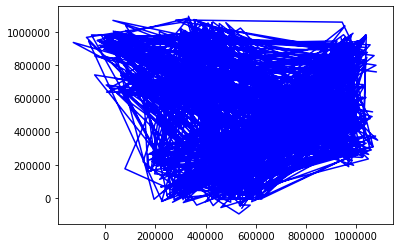

In [12]:
with open("data/tsp_1000_1") as f:
    input_data = f.read()
    
lines = input_data.split('\n')

nodeCount = int(lines[0])

points = []
for i in range(1, nodeCount+1):
    line = lines[i]
    parts = line.split()
    points.append(Point(float(parts[0]), float(parts[1])))
print(len(points))

plt.plot([point.x for point in points], [point.y for point in points], 'b-')

In [13]:
# import numpy as np
# import multiprocessing as mp
# from typing import Tuple, List
# def compute_distance(i: Point, j: Point):
#     return np.sqrt((i.x - j.x)**2 + (i.y - j.y)**2)


# def compute_distances(start: int, dim: int, points: List[Point]) -> np.array:
#     distances = np.zeros(dim - (start + 1))
#     for later_point in range(start + 1, dim):
#         distances[later_point - (start + 1)] = compute_distance(points[start], points[later_point])
#     return distances

# def get_distance(i: int, j: int, distances: List[np.array]) -> float:
#     sorted_indices = sorted([i, j])
#     print(sorted_indices)
#     return distances[sorted_indices[0]][sorted_indices[1] - (sorted_indices[0] + 1)]

In [14]:
# pool = mp.Pool(mp.cpu_count())
# dim = len(points)
# results = [pool.apply(compute_distances, args=(start, dim, points)) for start in range(dim - 1)]
# pool.close()


# import sys
# print(sys.getsizeof(results))
# distance_matrix = np.zeros((dim, dim))
# print(sys.getsizeof(distance_matrix))


           
#     for i in range(dim):
#         for j in range(i + 1, dim):
#             d = compute_distance(points[i], points[j])
#             distance_matrix[i, j] = d
#             distance_matrix[j, i] = d


number of points is: 1000
neighbors computed.
New best path distance: 129367132.43
New best path distance: 129326513.51
New best path distance: 128517868.23
New best path distance: 128503057.21
New best path distance: 128485325.01
New best path distance: 84922619.72
New best path distance: 50804448.53
New best path distance: 50785397.18
New best path distance: 50784860.31
New best path distance: 50784639.99
New best path distance: 50775965.74
New best path distance: 50753203.76
New best path distance: 50735070.97
New best path distance: 45736438.87
New best path distance: 39075326.18
New best path distance: 38999830.65
New best path distance: 34182383.34
New best path distance: 29024195.91
New best path distance: 27017418.18
New best path distance: 25941251.79
New best path distance: 23815339.14
New best path distance: 23799677.27
New best path distance: 23787547.63
New best path distance: 23547839.54
New best path distance: 23538006.06
New best path distance: 22547683.82
New best path

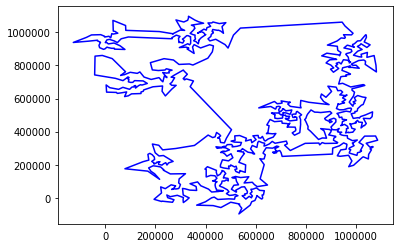

In [16]:
%%time
best_path, distance_best_path, best_distances = solve(points)
print(best_path)
plt.plot([points[i].x for i in best_path] + [points[best_path[0]].x], [points[i].y for i in best_path] + [points[best_path[0]].y], 'b-')

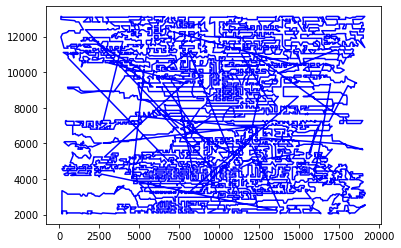

In [11]:
plt.plot([points[i].x for i in best_path] + [points[best_path[0]].x], [points[i].y for i in best_path] + [points[best_path[0]].y], 'b-')

In [3]:
import random
random.choices(range(5), k=3)

[2, 1, 1]

counter = 1000
counter = 2000
counter = 3000
counter = 4000
counter = 5000
counter = 6000
counter = 7000
counter = 8000
counter = 9000
[25, 83, 32, 4, 45, 27, 1, 2, 28, 16, 77, 42, 7, 0, 36, 58, 56, 6, 69, 61, 76, 35, 84, 94, 40, 47, 72, 51, 93, 99, 22, 18, 19, 71, 43, 65, 37, 13, 89, 3, 33, 59, 39, 48, 85, 87, 73, 67, 66, 64, 60, 81, 96, 57, 41, 50, 12, 55, 98, 97, 49, 20, 90, 63, 78, 95, 52, 92, 21, 70, 23, 8, 34, 17, 79, 88, 86, 54, 24, 68, 53, 14, 15, 75, 46, 5, 91, 38, 80, 29, 30, 74, 10, 11, 9, 26, 31, 44, 62, 82]


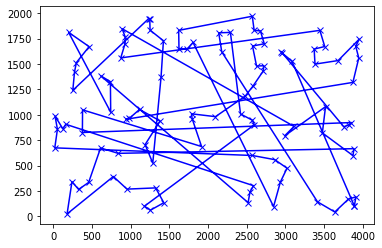

In [3]:
best_path, distance_best_path, best_distances = solve(points)
print(best_path)
plt.plot([points[i].x for i in best_path] + [points[best_path[0]].x], [points[i].y for i in best_path] + [points[best_path[0]].y], 'xb-')

[83, 92, 52, 95, 78, 49, 97, 20, 90, 63, 27, 45, 1, 54, 86, 25, 82, 62, 44, 31, 13, 89, 3, 17, 34, 38, 91, 57, 41, 6, 56, 58, 69, 18, 22, 99, 93, 51, 8, 23, 70, 21, 66, 64, 60, 81, 96, 28, 2, 33, 59, 39, 98, 55, 12, 50, 16, 77, 42, 7, 10, 74, 30, 0, 36, 61, 76, 35, 84, 48, 85, 87, 73, 67, 43, 37, 65, 71, 19, 24, 68, 15, 14, 75, 53, 46, 5, 29, 80, 11, 9, 26, 72, 47, 40, 94, 79, 88, 4, 32]


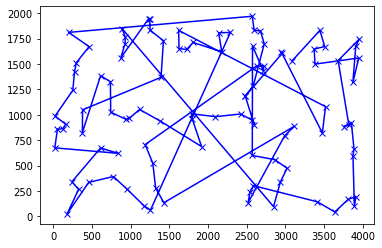

In [3]:
best_path, distance_best_path, best_distances = solve(points)
print(best_path)
plt.plot([points[i].x for i in best_path] + [points[0].x], [points[i].y for i in best_path] + [points[0].y], 'xb-')

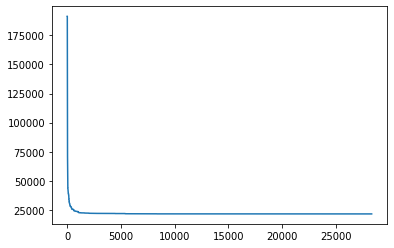

In [4]:
plt.plot([i for i in range(len(best_distances))], best_distances)

In [8]:
a = set([3,2,1])
a | {4}
a

{1, 2, 3}

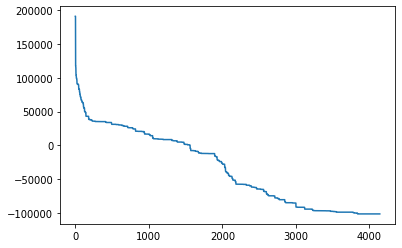

In [4]:
plt.plot([i for i in range(len(best_distances))], best_distances)

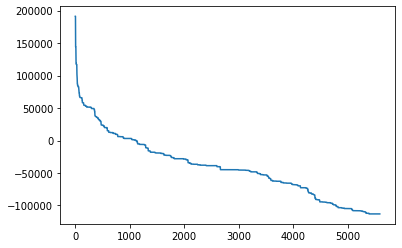

In [5]:
plt.plot([i for i in range(len(best_distances))], best_distances)

In [6]:
best_distances[-1]

19449.039769567436

In [4]:
best_distances[-1]

-112997.20499792784